In [1]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [2]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('../images') if isfile(join('../images', f))])

In [3]:
def bound_box(image_path):
    # load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    """print(image.shape)
    plt.imshow(gray, 'gray')"""

    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction using OpenCV 2.4
    ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
    gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    
    """vertical = False
    if cv2.convertScaleAbs(gradY).sum()>cv2.convertScaleAbs(gradX).sum():
        vertical = True"""

    #image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

    """plt.figure()
    plt.imshow(image_horizontal_derivative, 'gray')"""
    
    blurred = cv2.blur(gradient, (9, 9))
    ret2,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (20, 20))
    #closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
    #opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    dilated = cv2.dilate(opened, kernel, iterations=3)
    
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    #print(rect)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    # draw a bounding box arounded the detected barcode and display the
    # image
    image_bb = image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    print(coordinates_source)
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    
        
    # Computing the trasformation, i.e. homography. Warping.
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    # Applying the trasformation
    gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray1, 'gray')

[[ 399.  245.]
 [1290.  241.]
 [ 403. 1071.]
 [1294. 1067.]]
Wall time: 137 ms


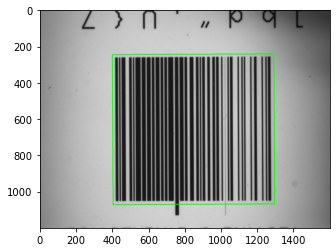

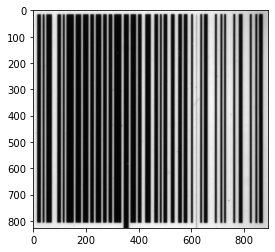

In [4]:
%%time
bound_box(f'../images/{images_paths[0]}')

[[ 348.  273.]
 [1243.  273.]
 [ 348. 1102.]
 [1243. 1102.]]
Wall time: 105 ms


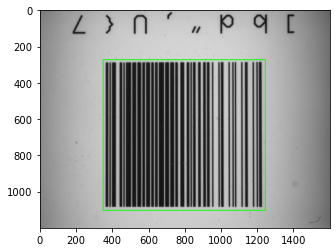

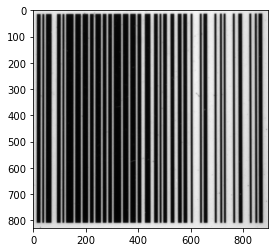

In [5]:
%%time
bound_box(f'../images/{images_paths[1]}')

[[ 199.  227.]
 [1037.  222.]
 [ 201.  741.]
 [1040.  736.]]
Wall time: 90.1 ms


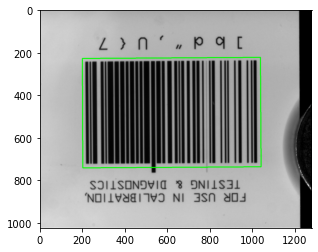

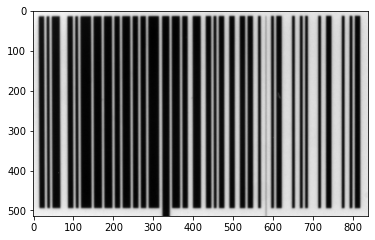

In [6]:
%%time
bound_box(f'../images/{images_paths[2]}')

[[129. 244.]
 [967. 244.]
 [129. 757.]
 [967. 757.]]
Wall time: 82.4 ms


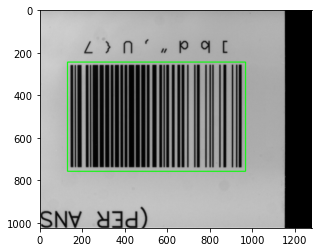

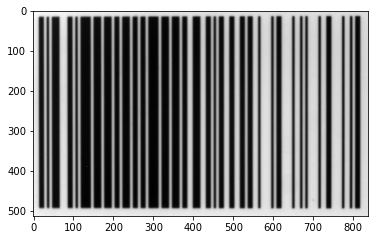

In [7]:
%%time
bound_box(f'../images/{images_paths[3]}')

[[336. 156.]
 [900. 158.]
 [334. 701.]
 [898. 702.]]
Wall time: 61 ms


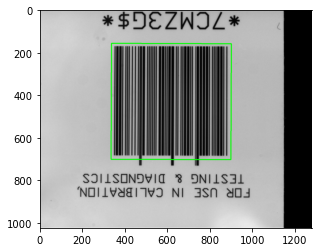

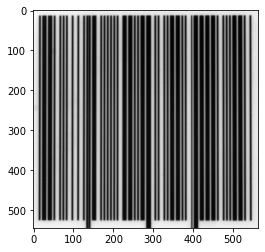

In [8]:
%%time
bound_box(f'../images/{images_paths[4]}')

[[341. 236.]
 [907. 236.]
 [341. 780.]
 [907. 780.]]


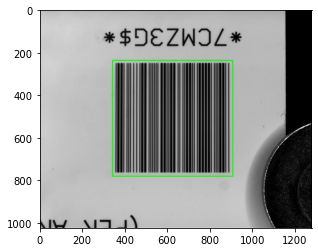

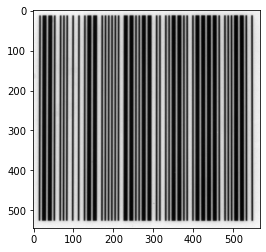

In [9]:
bound_box(f'../images/{images_paths[5]}')

[[ 164.  272.]
 [1098.  272.]
 [ 164.  817.]
 [1098.  817.]]


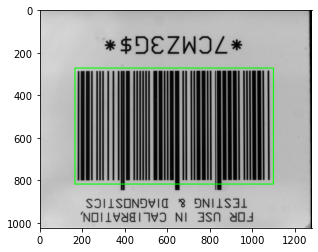

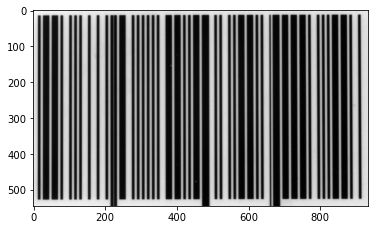

In [10]:
bound_box(f'../images/{images_paths[6]}')

[[ 150.  261.]
 [1089.  261.]
 [ 150.  806.]
 [1089.  806.]]


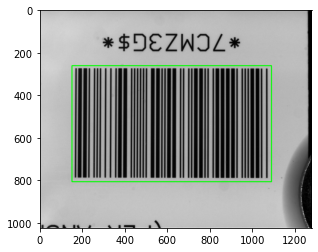

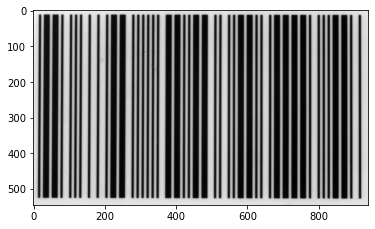

In [11]:
bound_box(f'../images/{images_paths[7]}')

[[ 150.  261.]
 [1089.  261.]
 [ 150.  806.]
 [1089.  806.]]


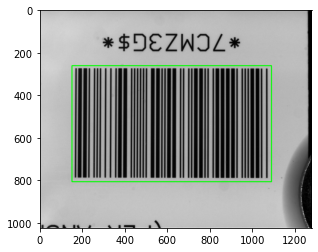

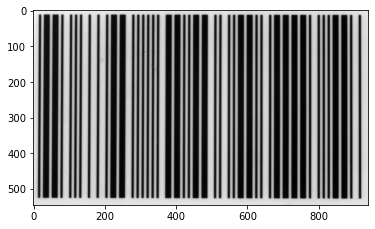

In [12]:
bound_box(f'../images/{images_paths[7]}')

[[330. 322.]
 [969. 326.]
 [328. 795.]
 [967. 799.]]


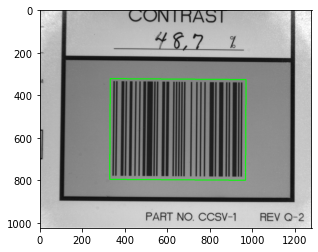

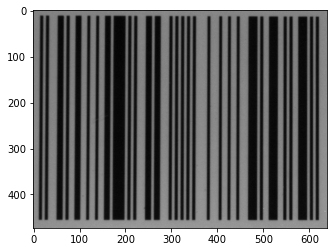

In [13]:
bound_box(f'../images/{images_paths[8]}')

[[343. 240.]
 [977. 249.]
 [336. 735.]
 [970. 744.]]


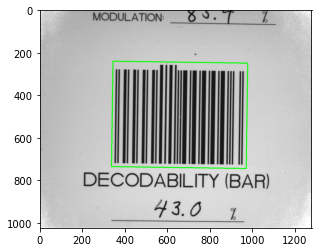

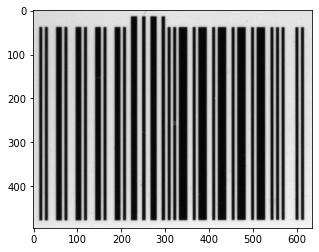

In [14]:
bound_box(f'../images/{images_paths[9]}')

In [15]:
print(f'../images/{images_paths[10]}')

images/EAN-UPC-DEFECTS IMGB.BMP


[[455. 180.]
 [923. 181.]
 [453. 813.]
 [921. 815.]]


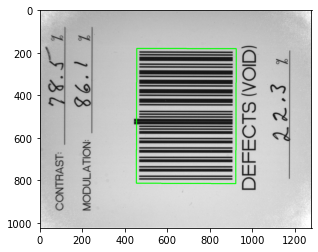

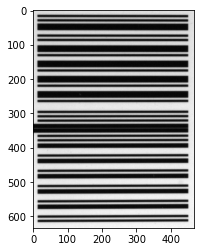

In [16]:
bound_box(f'../images/{images_paths[10]}')

[[263. 250.]
 [951. 247.]
 [265. 772.]
 [953. 769.]]


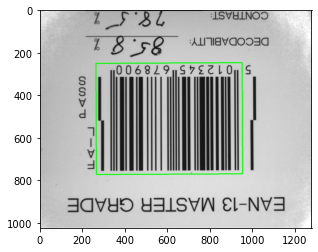

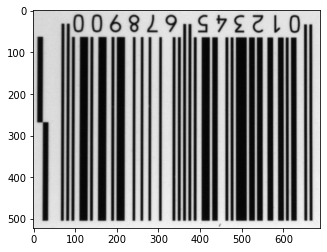

In [17]:
bound_box(f'../images/{images_paths[11]}')

[[365. 199.]
 [886. 199.]
 [365. 831.]
 [886. 831.]]


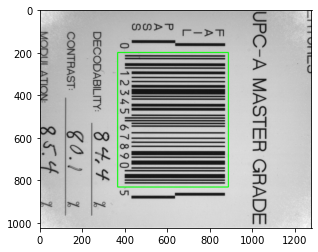

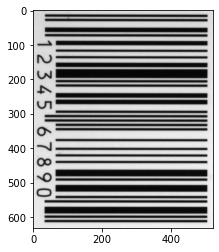

In [18]:
bound_box(f'../images/{images_paths[12]}')

[[  99.   54.]
 [1291.   55.]
 [  98.  326.]
 [1290.  328.]]


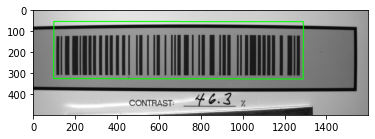

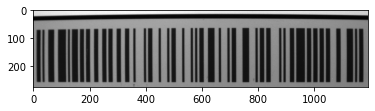

In [19]:
bound_box(f'../images/{images_paths[13]}')

[[  99.   54.]
 [1291.   55.]
 [  98.  326.]
 [1290.  328.]]


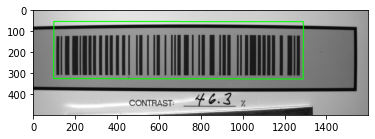

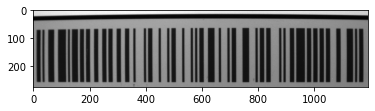

In [20]:
bound_box(f'../images/{images_paths[13]}')

[[ 162.  130.]
 [1347.  130.]
 [ 162.  351.]
 [1347.  351.]]


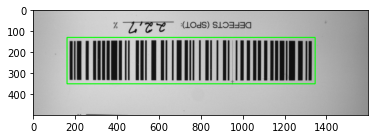

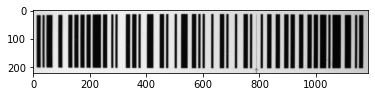

In [21]:
bound_box(f'../images/{images_paths[14]}')

[[ 176.  151.]
 [1381.  141.]
 [ 178.  465.]
 [1384.  455.]]


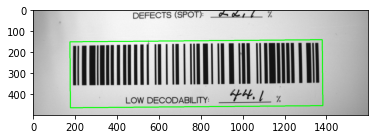

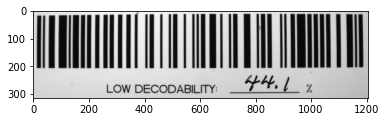

In [22]:
bound_box(f'../images/{images_paths[15]}')

[[ 176.  151.]
 [1381.  141.]
 [ 178.  465.]
 [1384.  455.]]


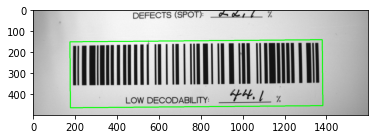

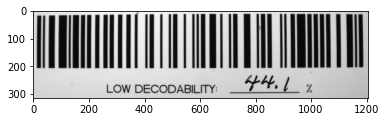

In [23]:
bound_box(f'../images/{images_paths[15]}')

[[ 200.  127.]
 [1387.  127.]
 [ 200.  347.]
 [1387.  347.]]


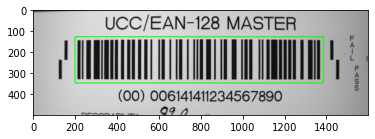

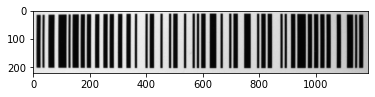

In [24]:
bound_box(f'../images/{images_paths[16]}')

[[ 200.  127.]
 [1387.  127.]
 [ 200.  347.]
 [1387.  347.]]


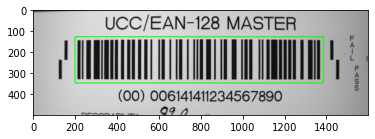

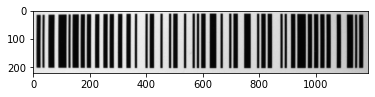

In [25]:
bound_box(f'../images/{images_paths[16]}')

[[ 195.  130.]
 [1348.  111.]
 [ 200.  401.]
 [1353.  382.]]


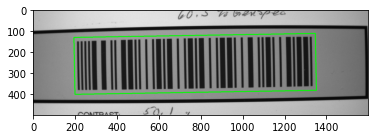

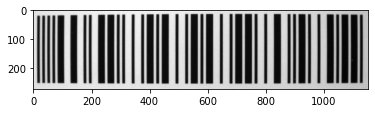

In [26]:
bound_box(f'../images/{images_paths[17]}')

[[ 197.  114.]
 [1354.  103.]
 [ 200.  386.]
 [1357.  375.]]


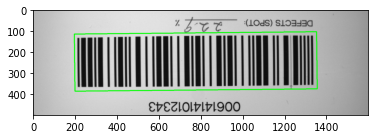

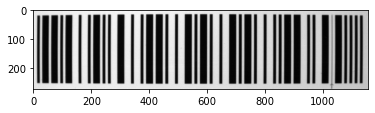

In [27]:
bound_box(f'../images/{images_paths[18]}')

[[ 231.   45.]
 [1382.   45.]
 [ 231.  390.]
 [1382.  390.]]


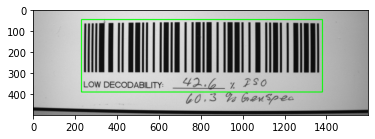

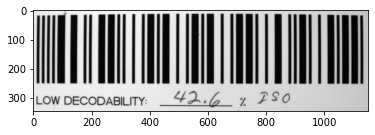

In [28]:
bound_box(f'../images/{images_paths[19]}')

[[ 248.  127.]
 [1404.  118.]
 [ 250.  397.]
 [1406.  388.]]


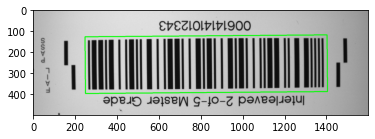

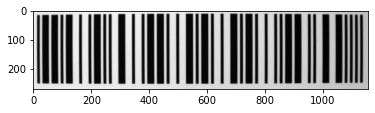

In [29]:
bound_box(f'../images/{images_paths[20]}')

[[241. 176.]
 [821. 169.]
 [247. 658.]
 [827. 651.]]


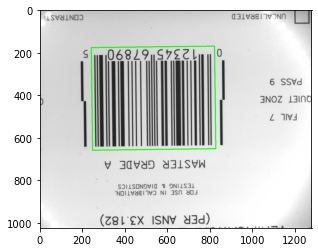

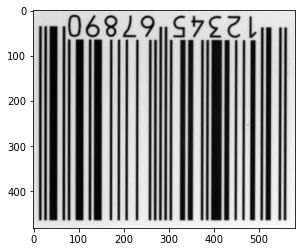

In [30]:
bound_box(f'../images/{images_paths[22]}')

[[241. 176.]
 [821. 169.]
 [247. 658.]
 [827. 651.]]


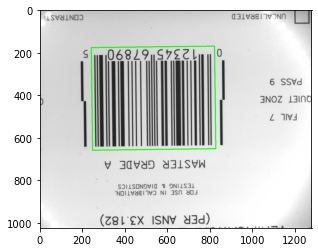

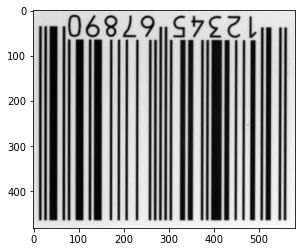

In [31]:
bound_box(f'../images/{images_paths[22]}')

[[314. 269.]
 [894. 274.]
 [310. 751.]
 [890. 756.]]


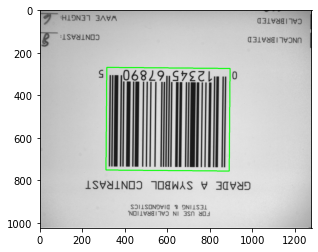

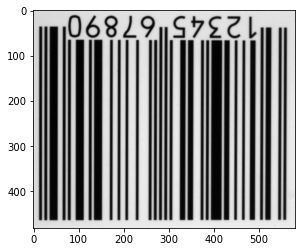

In [32]:
bound_box(f'../images/{images_paths[23]}')

[[348. 266.]
 [925. 275.]
 [340. 746.]
 [918. 756.]]


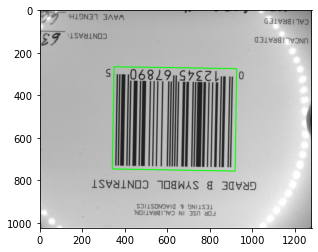

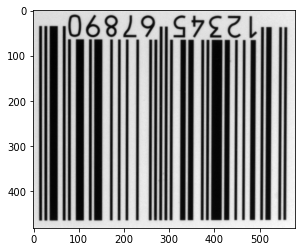

In [33]:
bound_box(f'../images/{images_paths[24]}')

[[355. 269.]
 [933. 271.]
 [354. 748.]
 [932. 750.]]


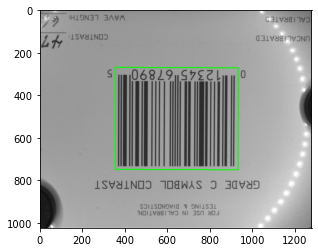

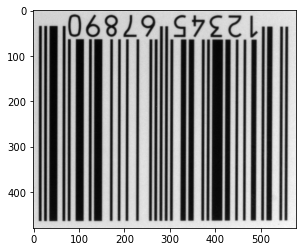

In [34]:
bound_box(f'../images/{images_paths[25]}')

[[296. 246.]
 [873. 265.]
 [280. 726.]
 [857. 745.]]


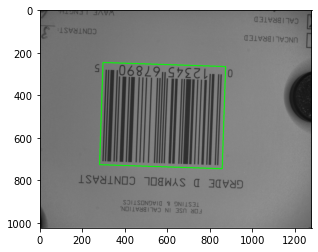

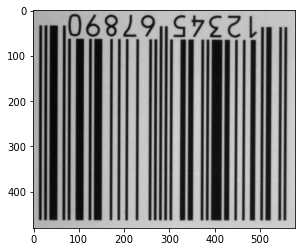

In [35]:
bound_box(f'../images/{images_paths[26]}')

[[332. 261.]
 [909. 270.]
 [325. 737.]
 [902. 745.]]


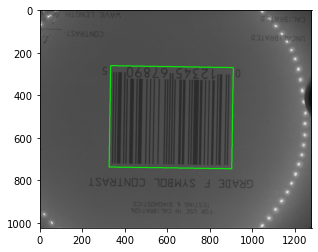

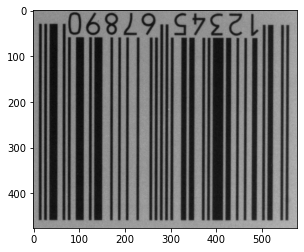

In [36]:
bound_box(f'../images/{images_paths[27]}')

[[326. 259.]
 [906. 266.]
 [320. 742.]
 [900. 749.]]


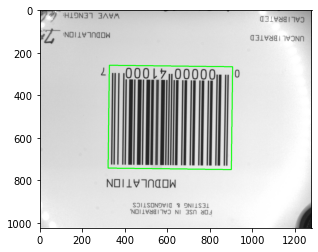

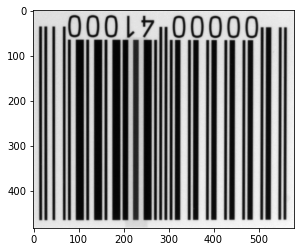

In [37]:
bound_box(f'../images/{images_paths[28]}')

[[326. 264.]
 [905. 273.]
 [318. 748.]
 [898. 757.]]


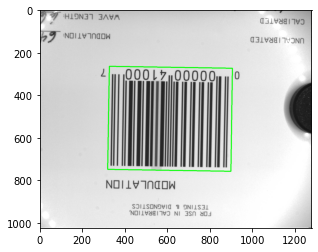

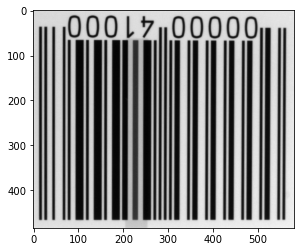

In [38]:
bound_box(f'../images/{images_paths[29]}')

[[323. 274.]
 [903. 286.]
 [313. 769.]
 [893. 780.]]


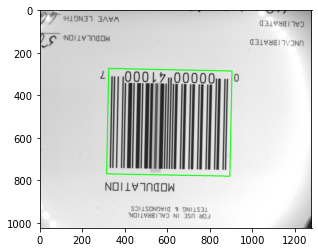

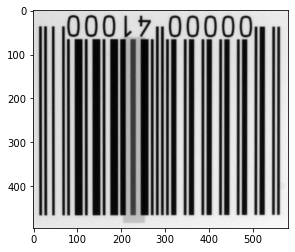

In [39]:
bound_box(f'../images/{images_paths[30]}')

[[331. 263.]
 [910. 279.]
 [318. 766.]
 [896. 782.]]


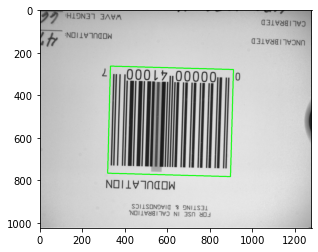

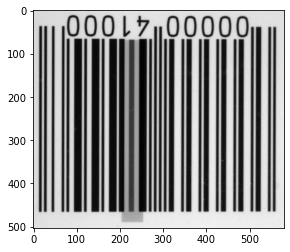

In [40]:
bound_box(f'../images/{images_paths[31]}')

[[331. 256.]
 [910. 256.]
 [331. 751.]
 [910. 751.]]


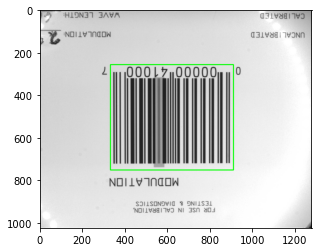

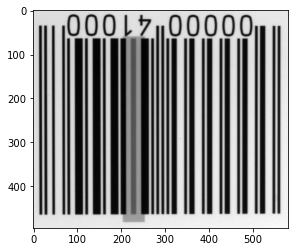

In [41]:
bound_box(f'../images/{images_paths[32]}')

[[344. 262.]
 [922. 267.]
 [340. 745.]
 [919. 749.]]


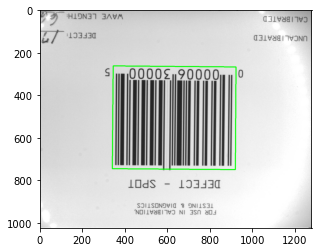

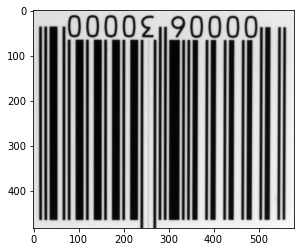

In [42]:
bound_box(f'../images/{images_paths[34]}')

[[344. 253.]
 [922. 260.]
 [338. 735.]
 [916. 742.]]


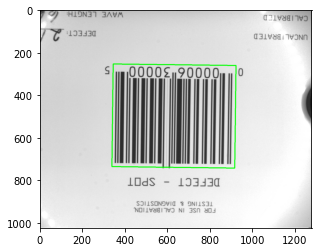

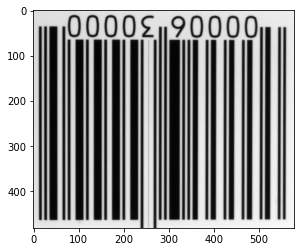

In [43]:
bound_box(f'../images/{images_paths[35]}')

[[331. 257.]
 [909. 257.]
 [331. 739.]
 [909. 739.]]


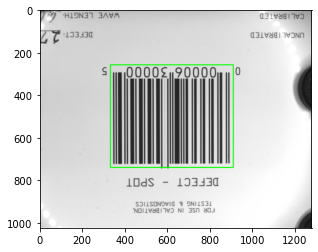

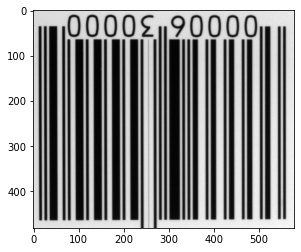

In [44]:
bound_box(f'../images/{images_paths[36]}')

[[318. 263.]
 [896. 264.]
 [318. 745.]
 [896. 745.]]


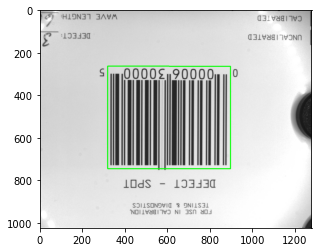

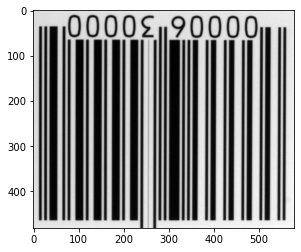

In [45]:
bound_box(f'../images/{images_paths[37]}')

[[330. 265.]
 [910. 265.]
 [330. 747.]
 [910. 747.]]


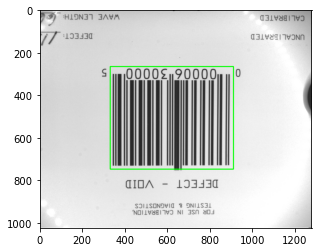

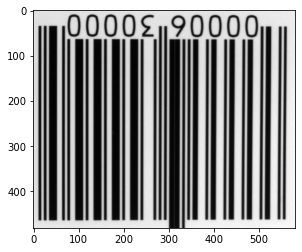

In [46]:
bound_box(f'../images/{images_paths[38]}')

[[334. 256.]
 [914. 262.]
 [329. 738.]
 [908. 745.]]


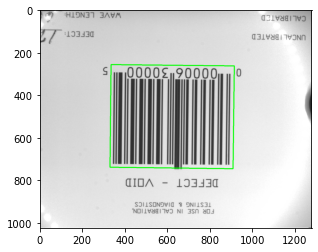

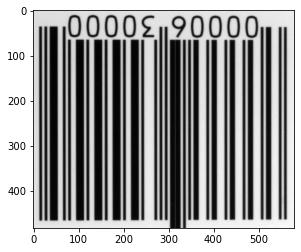

In [47]:
bound_box(f'../images/{images_paths[39]}')

[[298. 267.]
 [877. 268.]
 [296. 749.]
 [876. 750.]]


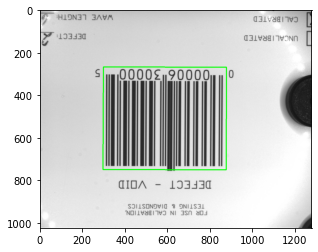

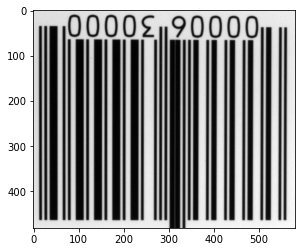

In [48]:
bound_box(f'../images/{images_paths[40]}')

[[298. 267.]
 [877. 268.]
 [296. 749.]
 [876. 750.]]


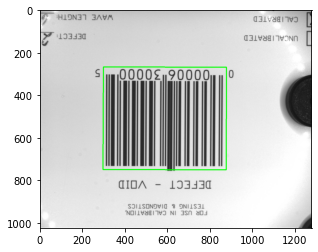

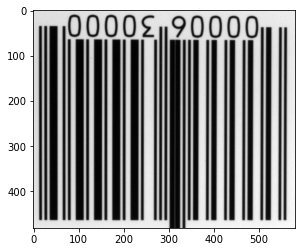

In [49]:
bound_box(f'../images/{images_paths[40]}')

[[287. 259.]
 [866. 256.]
 [289. 741.]
 [869. 738.]]


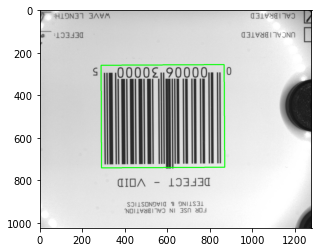

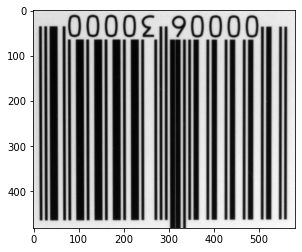

In [50]:
bound_box(f'../images/{images_paths[41]}')

[[285. 256.]
 [864. 256.]
 [285. 738.]
 [864. 738.]]


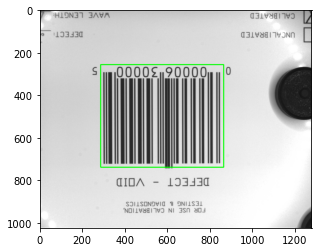

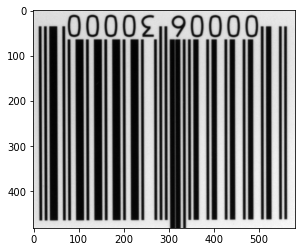

In [51]:
bound_box(f'../images/{images_paths[42]}')

[[280. 252.]
 [859. 252.]
 [280. 733.]
 [859. 733.]]


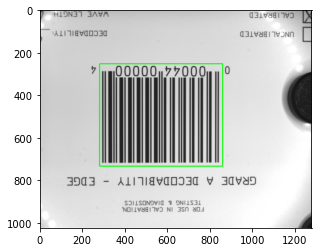

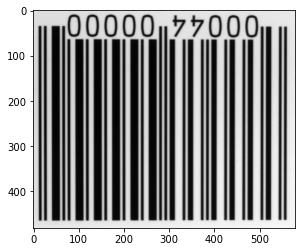

In [52]:
bound_box(f'../images/{images_paths[43]}')

[[280. 252.]
 [859. 252.]
 [280. 733.]
 [859. 733.]]


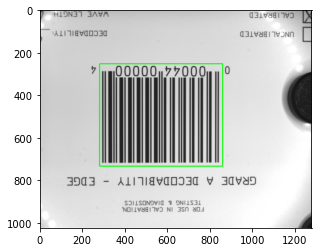

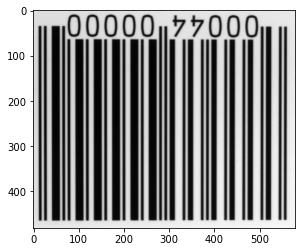

In [53]:
bound_box(f'../images/{images_paths[43]}')

[[290. 257.]
 [869. 261.]
 [287. 739.]
 [866. 743.]]


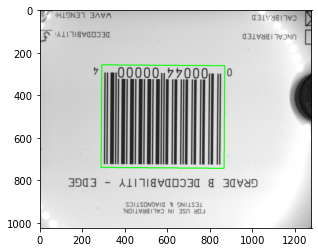

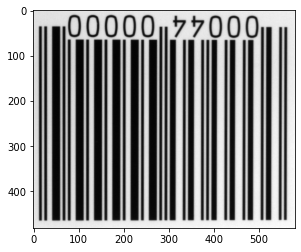

In [54]:
bound_box(f'../images/{images_paths[44]}')

[[279. 269.]
 [858. 272.]
 [276. 752.]
 [856. 755.]]


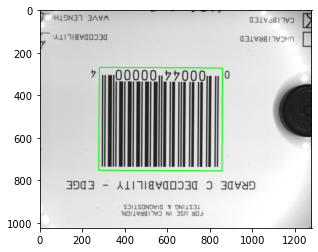

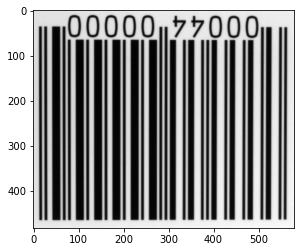

In [55]:
bound_box(f'../images/{images_paths[45]}')

[[263. 258.]
 [843. 266.]
 [256. 741.]
 [837. 749.]]


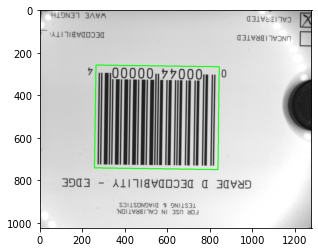

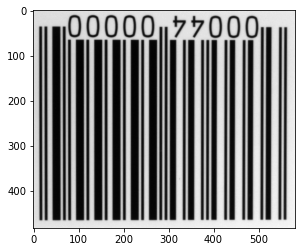

In [56]:
bound_box(f'../images/{images_paths[46]}')

[[257. 266.]
 [838. 271.]
 [253. 749.]
 [834. 753.]]


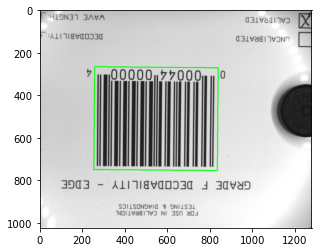

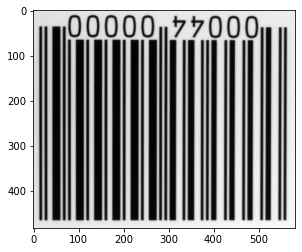

In [57]:
bound_box(f'../images/{images_paths[47]}')

[[252. 264.]
 [832. 273.]
 [245. 747.]
 [825. 755.]]


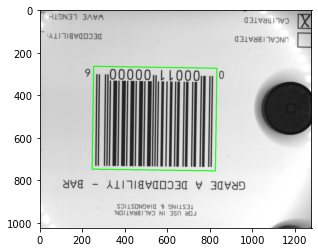

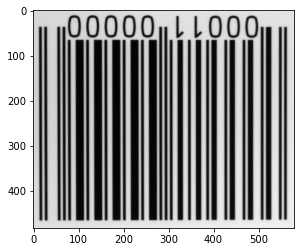

In [58]:
bound_box(f'../images/{images_paths[48]}')

[[255. 265.]
 [836. 272.]
 [250. 749.]
 [830. 755.]]


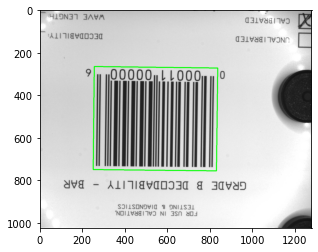

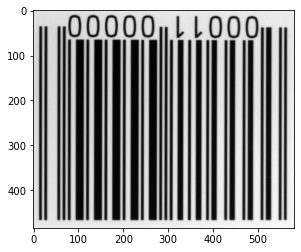

In [59]:
bound_box(f'../images/{images_paths[49]}')

[[280. 243.]
 [860. 251.]
 [274. 726.]
 [854. 733.]]


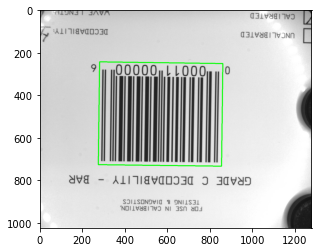

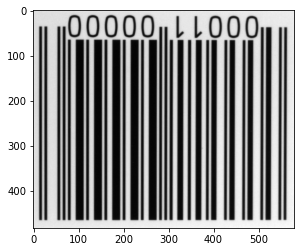

In [60]:
bound_box(f'../images/{images_paths[50]}')

[[283. 252.]
 [863. 261.]
 [275. 736.]
 [855. 744.]]


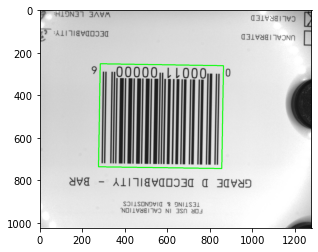

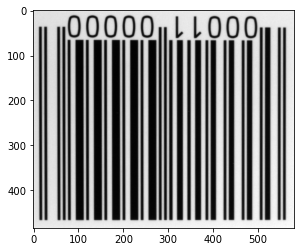

In [61]:
bound_box(f'../images/{images_paths[51]}')

[[295. 255.]
 [875. 257.]
 [293. 737.]
 [873. 740.]]


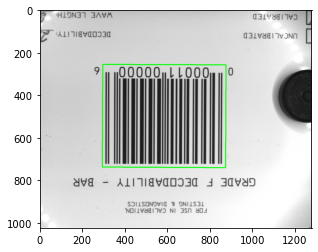

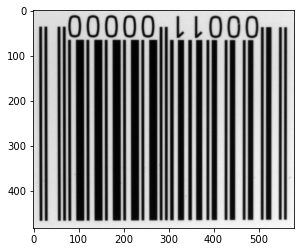

In [62]:
bound_box(f'../images/{images_paths[52]}')

[[ 97.  31.]
 [257.  31.]
 [ 97. 165.]
 [257. 165.]]
Wall time: 31.9 ms


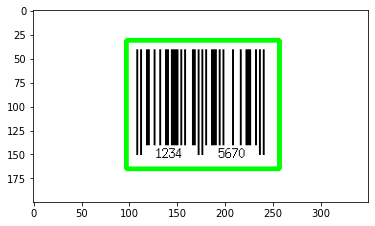

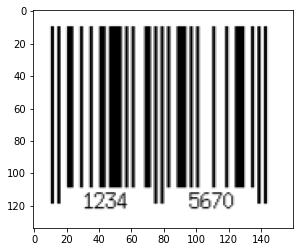

In [63]:
%%time
bound_box('other images/1.png')

[[   0.    0.]
 [1599.    0.]
 [   0.  283.]
 [1599.  283.]]
Wall time: 100 ms


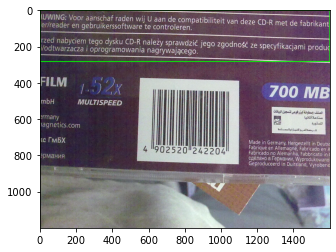

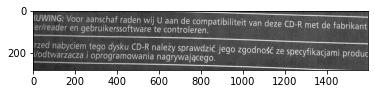

In [64]:
%%time
bound_box('other images/2.jpg')

[[   0.    0.]
 [1199.    0.]
 [   0. 1434.]
 [1199. 1434.]]
Wall time: 126 ms


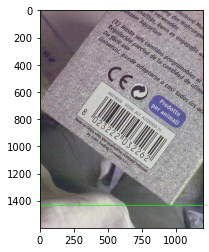

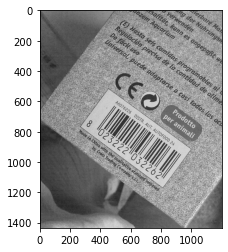

In [65]:
%%time
bound_box('other images/3.jpg')  # NO ROTATION INVARIANCE